In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 
import seaborn as sns 

font_location='c:/Windows/Fonts/malgunsl.ttf'
font_name=font_manager.FontProperties(
    fname=font_location).get_name()
rc('font', family=font_name)

df = pd.read_csv('c:/work/marketing_campaign.csv', sep='\t')

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


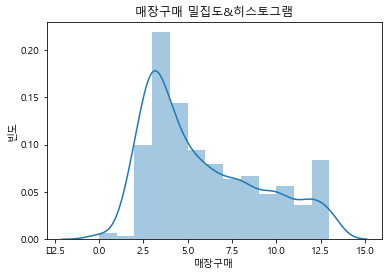

In [2]:
### seaborn으로 그래프 그리기 ###
## 밀집도 그래프와 히스토그램 같이 그리기 ##
# 그래프 바탕 생성
ax = plt.subplots()
# 밀집도 그래프 없애려면 kde=False 추가, 밀집도만 남기려면 hist=False 추가
ax = sns.distplot(df['NumStorePurchases'],kde=True,hist=True,bins=13) 
# 제목 생성
ax.set_title('매장구매 밀집도&히스토그램')
# x라벨
ax.set_xlabel('매장구매')
# y라벨
ax.set_ylabel('빈도')
#그래프 popup
plt.show()

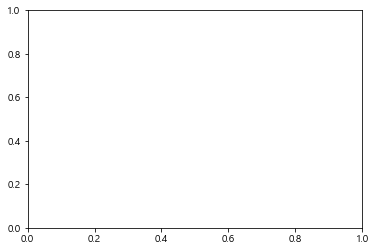

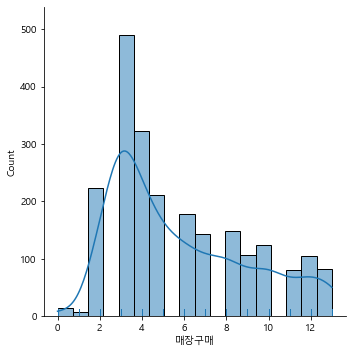

In [4]:
# rug추가
ax1 = plt.subplots()
ax1 = sns.displot(df['NumStorePurchases'],
    kde=True,rug=True)
ax1.set_titles('매장구매 히스토그램 양탄자그래프')
ax1.set_xlabels('매장구매')
plt.show()

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


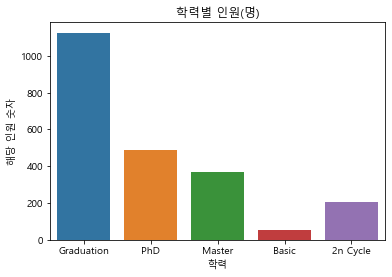

In [5]:
ax2 = plt.subplots()
ax2 = sns.countplot('Education', data=df)
ax2.set_title('학력별 인원(명)')
ax2.set_xlabel('학력')
ax2.set_ylabel("해당 인원 숫자")
plt.show()

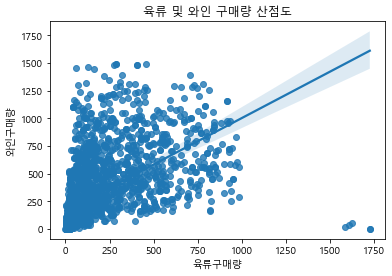

In [6]:
ax3 = plt.subplots()
ax3 = sns.regplot(x='MntMeatProducts',
    y='MntWines', data=df, fit_reg=True)
ax3.set_title('육류 및 와인 구매량 산점도')
ax3.set_xlabel('육류구매량')
ax3.set_ylabel('와인구매량')
plt.show() 

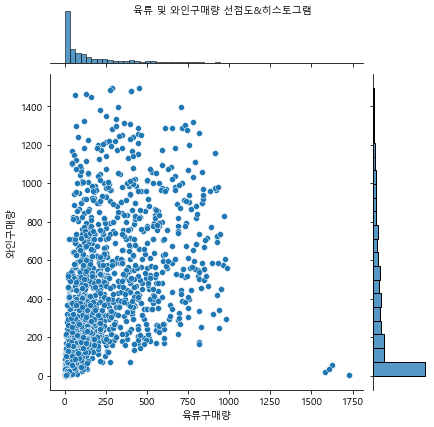

In [10]:
joint = sns.jointplot(x='MntMeatProducts',
    y='MntWines', data=df)
joint.set_axis_labels(xlabel='육류구매량', ylabel='와인구매량')
joint.fig.suptitle('육류 및 와인구매량 선점도&히스토그램',
    fontsize=10)
plt.show()

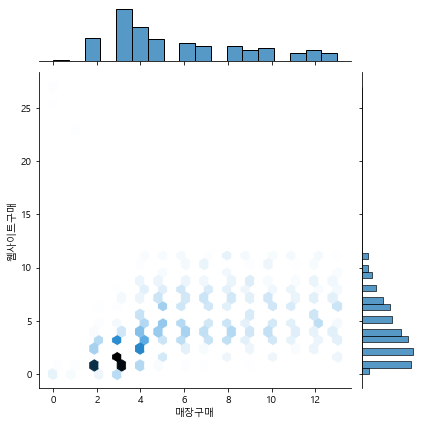

In [12]:
#육각그래프
hexbin = sns.jointplot(x='NumStorePurchases',
    y='NumWebPurchases', data=df, kind='hex')
hexbin.set_axis_labels(
    xlabel='매장구매',
    ylabel='웹사이트구매',
    fontsize=10
)
plt.show()

C:\Python39\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


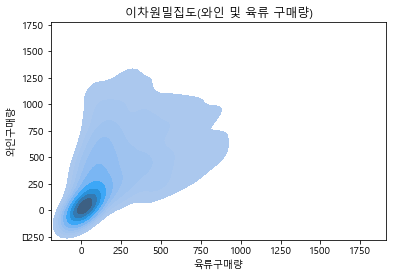

In [14]:
#이차원 밀집도 그리기
ax4 = plt.subplot()
ax4 = sns.kdeplot(data=df['MntMeatProducts'],
    data2=df['MntWines'],
    shade=True)
ax4.set_title('이차원밀집도(와인 및 육류 구매량)')
ax4.set_xlabel('육류구매량')
ax4.set_ylabel('와인구매량')
plt.show()

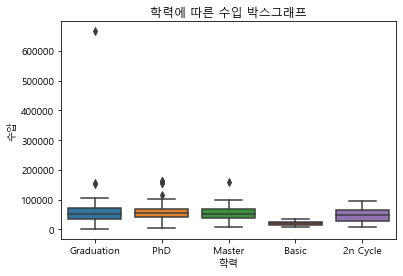

In [16]:
ax4 = plt.subplots()
ax4 = sns.boxplot(x='Education',
    y='Income',data=df)
ax4.set_title('학력에 따른 수입 박스그래프')
ax4.set_xlabel('학력')
ax4.set_ylabel('수압')
plt.show()

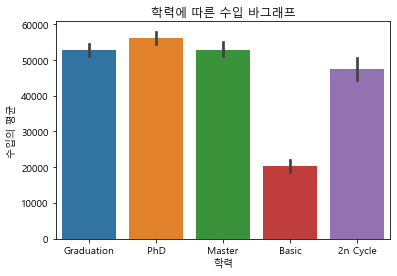

In [17]:
ax_4 = plt.subplots()
ax_4 = sns.barplot(x='Education',
    y='Income', data=df)
ax_4.set_title('학력에 따른 수입 바그래프')
ax_4.set_xlabel('학력')
ax_4.set_ylabel('수입의 평균')
plt.show()

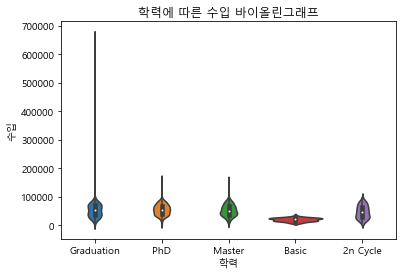

In [19]:
#바이올린 그래프 그리기 
ax5 = plt.subplots()
ax5 = sns.violinplot(x='Education',
    y='Income', data=df)
ax5.set_title('학력에 따른 수입 바이올린그래프')
ax5.set_xlabel('학력')
ax5.set_ylabel('수입')
plt.show()

In [20]:
df2 = df.loc[:, ['MntMeatProducts',
    'MntWines','NumWebPurchases']]
df2.head()

,MntMeatProducts,MntWines,NumWebPurchases
0,546,635,8
1,6,11,1
2,127,426,8
3,20,11,2
4,118,173,5


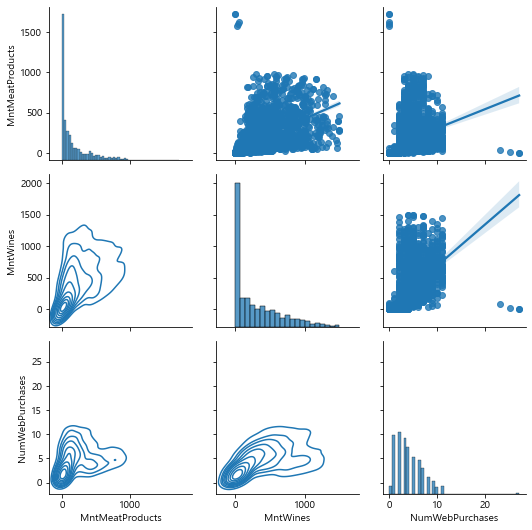

In [22]:
#관계 그래프 그리기 
pair_grid = sns.PairGrid(df2)
pair_grid = pair_grid.map_upper(sns.regplot) #대각선윗부분
pair_grid = pair_grid.map_lower(sns.kdeplot) #대각선아래부분
pair_grid = pair_grid.map_diag(sns.histplot) #대각선중심
plt.show()